<a href="https://colab.research.google.com/github/shayma-dridi/Formation_ML/blob/master/Project_GOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import string
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/game_of_thrones.csv')
df

,Unnamed: 0,Name,Reviews,Likes,Date
0,0,Eric Hazlett,0🪂0🏇🗯️🔱⛷️🏂🏇🪂💯🔊,5,2021-12-26 08:19:01
1,1,LeRoy Muhs,Green boxed failure,1,2021-12-26 06:34:42
2,2,Emrick Azor,So I just got a new phone.. this was on it by ...,1,2021-12-25 20:55:28
3,3,James Wiltz,👍👍👍👍👍👍👍👍👍👍👍👍👍👍,5,2021-12-25 18:40:47
4,4,Axel Retta,I can't delete my The app,1,2021-12-25 07:34:29
...,...,...,...,...,...
50037,6813,Mark Falconer,haha i literally got an advert for the game fo...,88,2019-06-05T13:58:54Z
50038,6814,Alphajet 101,I just came here from the Pokemon Direct. Had ...,20,2019-06-05T13:58:29Z
50039,6815,Sean Tyler Fermin,No surprise the game is just as shit as the show,0,2019-06-05T13:58:19Z
50040,6816,That Guy,RIGHT I GOT AN AD FOR THIS RIGHT NOW\n\n\n\n\n...,6,2019-06-05T13:58:10Z


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Unnamed: 0    0
Name          1
Reviews       3
Likes         0
Date          0
dtype: int64

In [ ]:
df.drop(df[df.Name.isna()].index, inplace=True)
df.drop(df[df.Reviews.isna()].index, inplace=True)
df.shape

(50038, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50038 entries, 0 to 50041
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50038 non-null  int64 
 1   Name        50038 non-null  object
 2   Reviews     50038 non-null  object
 3   Likes       50038 non-null  int64 
 4   Date        50038 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Unnamed: 0,Name,Reviews,Likes,Date
0,0,Eric Hazlett,0🪂0🏇🗯️🔱⛷️🏂🏇🪂💯🔊,5,2021-12-26 08:19:01
1,1,LeRoy Muhs,Green boxed failure,1,2021-12-26 06:34:42
2,2,Emrick Azor,So I just got a new phone.. this was on it by ...,1,2021-12-25 20:55:28
3,3,James Wiltz,👍👍👍👍👍👍👍👍👍👍👍👍👍👍,5,2021-12-25 18:40:47
4,4,Axel Retta,I can't delete my The app,1,2021-12-25 07:34:29


In [ ]:
df['Reviews']

0                                           0🪂0🏇🗯️🔱⛷️🏂🏇🪂💯🔊
1                                      Green boxed failure
2        So I just got a new phone.. this was on it by ...
3                                           👍👍👍👍👍👍👍👍👍👍👍👍👍👍
4                                I can't delete my The app
                               ...                        
50037    haha i literally got an advert for the game fo...
50038    I just came here from the Pokemon Direct. Had ...
50039     No surprise the game is just as shit as the show
50040    RIGHT I GOT AN AD FOR THIS RIGHT NOW\n\n\n\n\n...
50041    As much as I'll miss Chris, Sheila and Kevin u...
Name: Reviews, Length: 50038, dtype: object

In [ ]:
df['Polarity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df

,Unnamed: 0,Name,Reviews,Likes,Date,Polarity
0,0,Eric Hazlett,0🪂0🏇🗯️🔱⛷️🏂🏇🪂💯🔊,5,2021-12-26 08:19:01,0.000000
1,1,LeRoy Muhs,Green boxed failure,1,2021-12-26 06:34:42,-0.258333
2,2,Emrick Azor,So I just got a new phone.. this was on it by ...,1,2021-12-25 20:55:28,-0.354545
3,3,James Wiltz,👍👍👍👍👍👍👍👍👍👍👍👍👍👍,5,2021-12-25 18:40:47,0.000000
4,4,Axel Retta,I can't delete my The app,1,2021-12-25 07:34:29,0.000000
...,...,...,...,...,...,...
50037,6813,Mark Falconer,haha i literally got an advert for the game fo...,88,2019-06-05 13:58:54+00:00,-0.100000
50038,6814,Alphajet 101,I just came here from the Pokemon Direct. Had ...,20,2019-06-05 13:58:29+00:00,0.100000
50039,6815,Sean Tyler Fermin,No surprise the game is just as shit as the show,0,2019-06-05 13:58:19+00:00,-0.300000
50040,6816,That Guy,RIGHT I GOT AN AD FOR THIS RIGHT NOW\n\n\n\n\n...,6,2019-06-05 13:58:10+00:00,0.273810


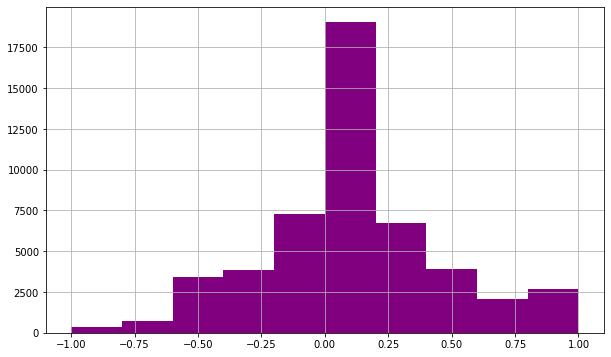

In [ ]:
plt.figure(figsize = (10,6))
df['Polarity'].hist(color = 'purple')

In [ ]:
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [ ]:
df['Reviews'] = df['Reviews'].apply(punctuation_removal)
df['Reviews'].head()

0                                       0🪂0🏇🗯️🔱⛷️🏂🏇🪂💯🔊
1                                  Green boxed failure
2    So I just got a new phone this was on it by de...
3                                       👍👍👍👍👍👍👍👍👍👍👍👍👍👍
4                             I cant delete my The app
Name: Reviews, dtype: object

In [ ]:
stop = stopwords.words('english')
stop.append("i'm")


In [ ]:
stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 
print(stop_words[::12])

['i', 'youd', 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', 'dont', 'aren', 'haven', 'shant']


In [ ]:
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words and word.lower() ]

In [ ]:
nltk.download('punkt')

df['Reviews'] = df['Reviews'].apply(stopwords_removal)
df['Reviews'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0                                   [0🪂0🏇🗯️🔱⛷️🏂🏇🪂💯🔊]
1                            [green, boxed, failure]
2    [got, new, phone, default, hate, game, thrones]
3                                   [👍👍👍👍👍👍👍👍👍👍👍👍👍👍]
4                                [cant, delete, app]
Name: Reviews, dtype: object

In [ ]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

In [ ]:
df['Reviews'] = df['Reviews'].apply(drop_numbers)
df['Reviews'].head()

0                                           
1                        green boxed failure
2    got new phone default hate game thrones
3                             👍👍👍👍👍👍👍👍👍👍👍👍👍👍
4                            cant delete app
Name: Reviews, dtype: object

In [ ]:
porter = PorterStemmer()
df['Reviews'] = df['Reviews'].apply(lambda x: x.split())
df['Reviews'].head()

0                                                 []
1                            [green, boxed, failure]
2    [got, new, phone, default, hate, game, thrones]
3                                   [👍👍👍👍👍👍👍👍👍👍👍👍👍👍]
4                                [cant, delete, app]
Name: Reviews, dtype: object

In [ ]:
def stem_update(text_list):
    text_list_new = []
    for word in text_list:
        word = porter.stem(word)
        text_list_new.append(word) 
    return text_list_new

In [ ]:
df['Reviews'] = df['Reviews'].apply(stem_update)
df['Reviews'].head()

0                                                []
1                              [green, box, failur]
2    [got, new, phone, default, hate, game, throne]
3                                  [👍👍👍👍👍👍👍👍👍👍👍👍👍👍]
4                                [cant, delet, app]
Name: Reviews, dtype: object

In [ ]:
def sentiment(polarity):
  if polarity <0:
    return 0
  else:
    return 1

In [ ]:
df['Sentiment'] = df['Polarity'].apply(sentiment)
df

,Unnamed: 0,Name,Reviews,Likes,Date,Polarity,Sentiment
0,0,Eric Hazlett,[],5,2021-12-26 08:19:01,0.000000,1
1,1,LeRoy Muhs,"[green, box, failur]",1,2021-12-26 06:34:42,-0.258333,0
2,2,Emrick Azor,"[got, new, phone, default, hate, game, throne]",1,2021-12-25 20:55:28,-0.354545,0
3,3,James Wiltz,[👍👍👍👍👍👍👍👍👍👍👍👍👍👍],5,2021-12-25 18:40:47,0.000000,1
4,4,Axel Retta,"[cant, delet, app]",1,2021-12-25 07:34:29,0.000000,1
...,...,...,...,...,...,...,...
50037,6813,Mark Falconer,"[haha, liter, got, advert, game, video]",88,2019-06-05 13:58:54+00:00,-0.100000,0
50038,6814,Alphajet 101,"[came, pokemon, direct, say, jay]",20,2019-06-05 13:58:29+00:00,0.100000,1
50039,6815,Sean Tyler Fermin,"[surpris, game, shit, show]",0,2019-06-05 13:58:19+00:00,-0.300000,0
50040,6816,That Guy,"[right, got, ad, right, jk, wouldv, funni]",6,2019-06-05 13:58:10+00:00,0.273810,1


(array([15622.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 34416.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

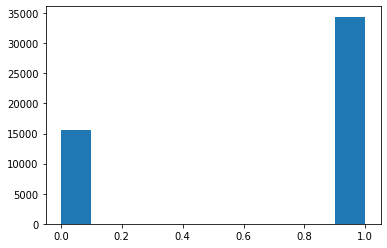

In [ ]:
plt.hist(df['Sentiment'])

In [ ]:

df.Reviews = df.Reviews.astype(str)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vect=TfidfVectorizer(use_idf=True, max_features = 20000) 
X = vect.fit_transform(df['Reviews'])
Y=df['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 1,test_size=0.2)


In [ ]:
SEED=123

dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(X_train,y_train)
y_pred_test = dt.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,dt.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,dt.predict(X_test)),4)))

Training Accuracy score: 0.9948
Testing Accuracy score: 0.8723


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.78      0.81      0.80      3073
    negative       0.91      0.90      0.91      6935

    accuracy                           0.87     10008
   macro avg       0.85      0.85      0.85     10008
weighted avg       0.87      0.87      0.87     10008



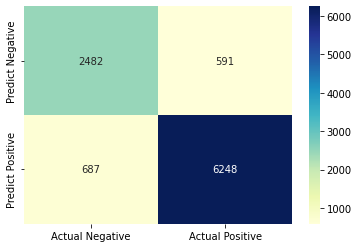

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Positive'], 
                        index=['Predict Negative',  'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
text=["bad game"]

vectorize=vect.transform(text)

print(dt.predict(vectorize))

[0]


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
X = df['Reviews'].values
y = df['Sentiment'].values

In [ ]:
num_words = 10000 
# We have defined the most frequent 10000 repeated words in corpus for tokenizing. We ignore the rest.

tokenizer = Tokenizer(num_words=num_words) 

In [ ]:
tokenizer.fit_on_texts(X)
X_num_tokens = tokenizer.texts_to_sequences(X)
np.array(X_num_tokens)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


array([list([]), list([1588, 1202, 1589]),
       list([11, 70, 47, 1590, 276, 1, 28]), ..., list([627, 1, 301, 59]),
       list([162, 11, 19, 162, 4058, 1693, 618]),
       list([24, 316, 518, 1201, 1180, 199, 73, 532, 372, 184, 9, 75, 1539, 255, 469])],
      dtype=object)

In [ ]:
max_tokens = 103
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)  

In [ ]:
model = Sequential()
embedding_size = 100
model.add(Embedding(input_dim=num_words,        
                    output_dim=embedding_size,                                       
                    input_length=max_tokens,    
                    name='embedding_layer')) 

In [ ]:
model.add(GRU(units=48, return_sequences=True))  
model.add(GRU(units=24, return_sequences=True)) 
model.add(GRU(units=12)) 
model.add(Dense(1, activation='sigmoid'))  

In [ ]:
optimizer = Adam(learning_rate=0.006)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
model.summary() 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 103, 100)         1000000   
                                                                 
 gru (GRU)                   (None, 103, 48)           21600     
                                                                 
 gru_1 (GRU)                 (None, 103, 24)           5328      
                                                                 
 gru_2 (GRU)                 (None, 12)                1368      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 1,028,309
Trainable params: 1,028,309
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 10, restore_best_weights=True)

In [ ]:
pd.Series(y_train).value_counts(normalize=True) 


1    0.687809
0    0.312191
dtype: float64

In [ ]:
weights = {0:82, 1:18}
model.fit(X_train, y_train, epochs=10, batch_size=5000, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
9/9 [==============================] - 48s 4s/step - loss: 21.6406 - accuracy: 0.5351 - val_loss: 0.6739 - val_accuracy: 0.6438
Epoch 2/10
9/9 [==============================] - 38s 4s/step - loss: 14.5655 - accuracy: 0.7464 - val_loss: 0.4834 - val_accuracy: 0.8122
Epoch 3/10
9/9 [==============================] - 37s 4s/step - loss: 10.2941 - accuracy: 0.8581 - val_loss: 0.3491 - val_accuracy: 0.8718
Epoch 4/10
9/9 [==============================] - 37s 4s/step - loss: 8.9468 - accuracy: 0.8817 - val_loss: 0.3905 - val_accuracy: 0.8526
Epoch 5/10
9/9 [==============================] - 38s 4s/step - loss: 7.9095 - accuracy: 0.8866 - val_loss: 0.3399 - val_accuracy: 0.8735
Epoch 6/10
9/9 [==============================] - 38s 4s/step - loss: 6.9132 - accuracy: 0.9115 - val_loss: 0.3377 - val_accuracy: 0.8724
Epoch 7/10
9/9 [==============================] - 37s 4s/step - loss: 6.2303 - accuracy: 0.9249 - val_loss: 0.3260 - val_accuracy: 0.8844
Epoch 8/10
9/9 [===============

In [ ]:
model.evaluate(X_train, y_train)


1251/1251 [==============================] - 34s 27ms/step - loss: 0.1609 - accuracy: 0.9527


[0.16085228323936462, 0.9526605010032654]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")  

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[12169   328]
 [ 1567 25966]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     12497
           1       0.99      0.94      0.96     27533

    accuracy                           0.95     40030
   macro avg       0.94      0.96      0.95     40030
weighted avg       0.96      0.95      0.95     40030



In [ ]:
review = "Love this game"
tokens = tokenizer.texts_to_sequences(review)
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
mod_pred = model.predict(tokens_pad)
mod_pred


array([[0.97917926],
       [0.97917926],
       [0.97917926],
       [0.97917926],
       [0.97917926],
       [0.97917926],
       [0.97917926],
       [0.97917926],
       [0.97917926],
       [0.97917926],
       [0.97917926],
       [0.97917926],
       [0.97917926],
       [0.97917926]], dtype=float32)

# Nouvelle section